# **BITCOIN PRICE PREDICTION**
Project By: Apurva Suryawanshi

In [ ]:
pip install yfinance

here by installing the yfinance  this is a library that uses yhaoo finance to get all prices required in the model so will be extracting bitcoin prices using yahoo finance.

In [2]:
import yfinance as yf

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
df=yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-02-16,51937.726562,52537.968750,51641.367188,52160.203125,52160.203125,28180567298
2024-02-17,52161.675781,52191.914062,50669.667969,51662.996094,51662.996094,20009091006
2024-02-18,51661.968750,52356.964844,51233.707031,52122.546875,52122.546875,17595377311


Now,lets import all the important libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


Here we will be using df.index because date is in the index

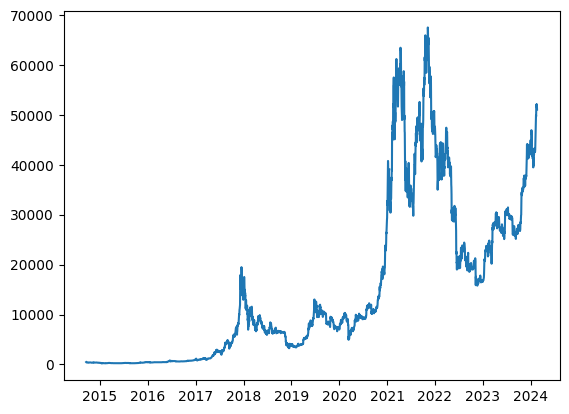

In [6]:
plt.plot(df.index,df['Adj Close'])
plt.show()

here you can see the bitcoin prices have gone up, so we will use 90% of the bitcoin prices as training set and the remaining 10% will use as the testing set so will split the data into two train and test.

In [7]:
# Train Test Split

to_row = int(len(df)*0.9)

training_data= list(df[0:to_row]['Adj Close'])
testing_data= list(df[to_row:]['Adj Close'])

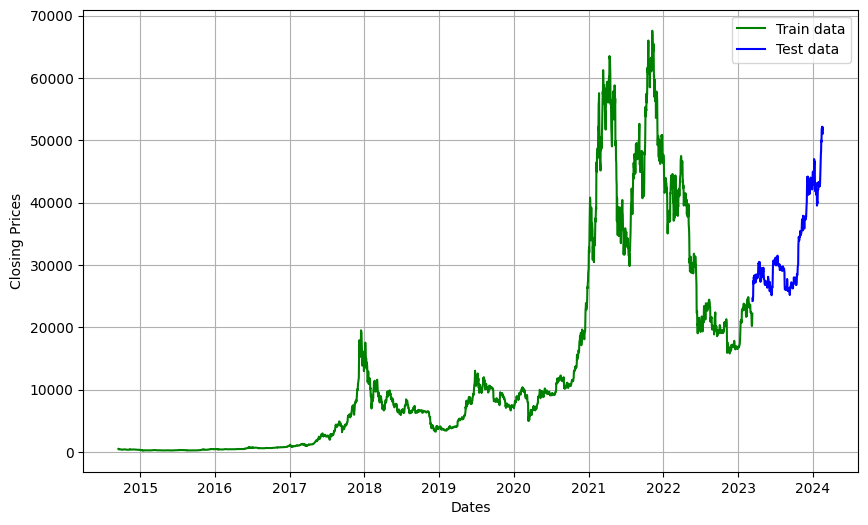

In [8]:
#Split data into train and training set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'],'green',label='Train data')
plt.plot(df[to_row:]['Adj Close'],'blue',label='Test data')
plt.legend()

Now this graphical representation makes it very clear that the green part is the training set and the blue part is the testing set,we have plotted this using matplotlib.

Now lets build the ARIMA model

In [9]:
model_predictictions= []
n_test_obser= len(testing_data)

We will write the ARIMA model which will be Rolling model because we are using the historical data in order to predict the future data, so if in case it starts t=0 for example in this case by saying t=0 we mean at this point if it starts then we go in future so the historic window in the ARIMA model will be increasing

so we need to change the training set for all iterations and then that will be used to predict the prices

In [10]:
for i in range(n_test_obser):
  model = ARIMA(training_data, order = (4,1,0))
  model_fit =model.fit()
  output = model_fit.forecast()
  yhat = (output[0])
  model_predictictions.append(yhat)
  actual_test_value = testing_data[i]
  training_data.append(actual_test_value)

The No's which we use here are p,d,q that are auto ARIMA model which actually does simulations for different numbers of p,q,d this gives us the best numbers which should be used as p,q,d

In [11]:
(output[0])

51788.49596646932

In [12]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3443
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27832.805
Date:                Tue, 20 Feb 2024   AIC                          55675.610
Time:                        17:51:47   BIC                          55706.329
Sample:                             0   HQIC                         55686.583
                               - 3443                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0268      0.009     -2.935      0.003      -0.045      -0.009
ar.L2          0.0131      0.009      1.501      0.133      -0.004       0.030
ar.L3          0.0247      0.009      2.621      0.0

Now,lets visualize data through graph

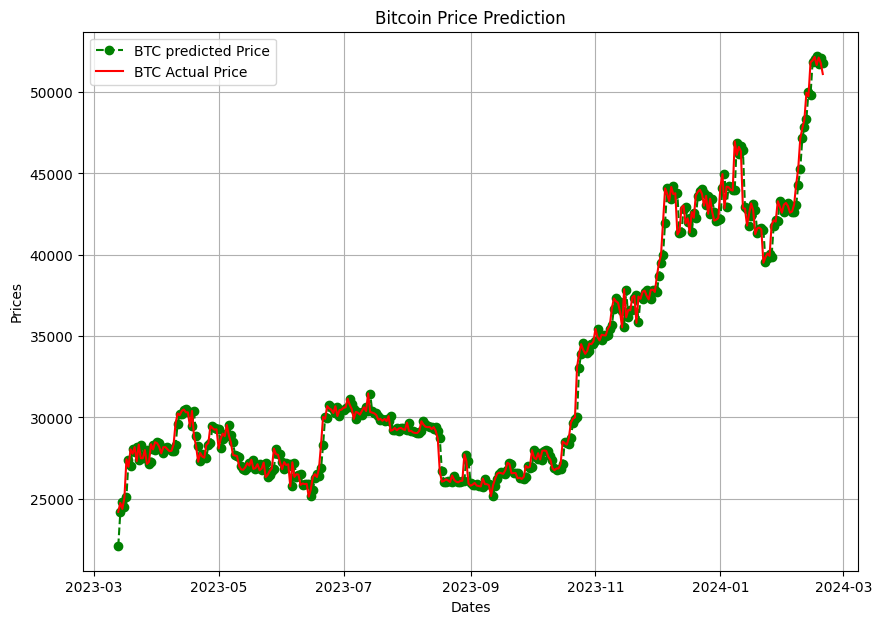

In [25]:
plt.figure(figsize=(10,7))
plt.grid(True)

date_range = df[to_row:].index

pd.date_range = df[to_row:].index

plt.plot(date_range, model_predictictions, color = 'green',marker='o',linestyle = 'dashed', label = 'BTC predicted Price')
plt.plot(date_range, testing_data,color = 'red', label = 'BTC Actual Price')

plt.title('Bitcoin Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()
plt.show()

As this model overlaps so to predict prices right we wrote the formula for M-A-P-E (mean absolute percentage error)
the formula is we subtract the mean prediction value with the absolute value and divide it with actual value to calculate the MAPE value

In [27]:
# report performance
mape = np.mean(np.abs(model_predictictions - np.array(testing_data))/np.abs(testing_data))
print('MAPE:'+str(mape)) #Mean Absolute Percentage Error

MAPE:0.014905514116566364


In [32]:
print(f'''
mape   : { round(mape, 2) }
mape % : { round(mape*100, 2) } % ''')

 
mape   : 0.01 
mape % : 1.49 % 


Around 1.49% MAPE implies the model is about 98.51% accurate in predicting the test set observations.
The best value for MAPE is 0.0
but,mape suggests that there is 1.5% error in the forecasted value

project by: Apurva Suryawanshi